In [31]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline
import torch
import gc

print("imports done!")

imports done!


In [32]:
# use this code to free up gpu memory
gc.collect()
torch.cuda.empty_cache()
print("freed up some memory!")

freed up some memory!


In [33]:
# load model and scheduler

model_id = "stabilityai/stable-diffusion-x4-upscaler"
device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cuda":
    print("device detected:", device)
    pipeline = StableDiffusionUpscalePipeline.from_pretrained(
    model_id, variant="fp16", torch_dtype=torch.float16)
    pipeline = pipeline.to("cuda")
else:
    print("device detected:", device)
    print("Using a cpu will take a lot of time (~ 1 hour) to enhance the image!!!")
    print("Consider using a gpu instead...")
    print("Anyways the process has started, though you can exit it anytime...")
    pipeline = StableDiffusionUpscalePipeline.from_pretrained(
    model_id, variant="fp16")
    pipeline = pipeline.to("cpu")

print("pipeline created!")

device detected: cuda


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

pipeline created!


In [34]:
# let's download an  image
low_res_size = 128
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
low_res_img = low_res_img.resize((low_res_size, low_res_size))

print("image downloaded!")

image downloaded!


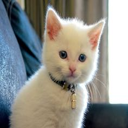

In [35]:
low_res_img

In [36]:
if device == "cpu":
    print("consider writing a prompt describing the image so that stable diffusion can make reasonable enhancements")
    prompt = "a cat"
else:
    prompt = ""
upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
print("image upscaled!")

  0%|          | 0/75 [00:00<?, ?it/s]

image upscaled!


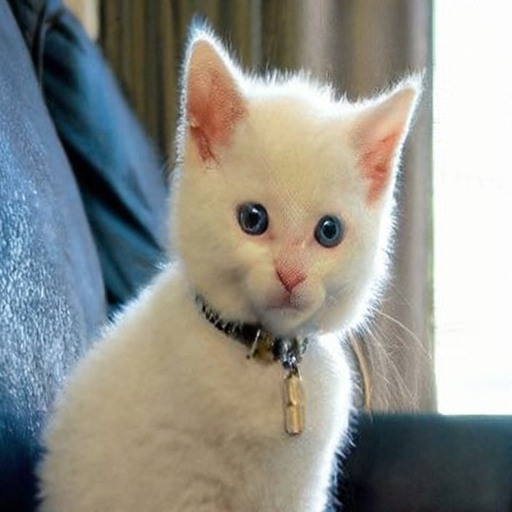

In [37]:
upscaled_image

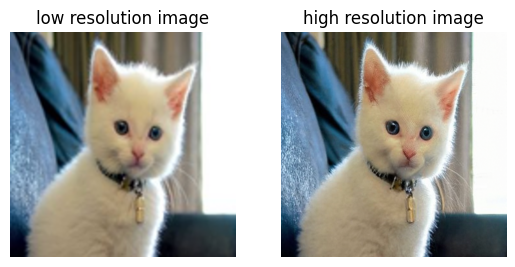

In [38]:
low_res_img = low_res_img.resize((512,512))
plt.subplot(1,2,1)
plt.imshow(low_res_img)
plt.title("low resolution image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(upscaled_image)
plt.title("high resolution image")
plt.axis("off")
plt.show()